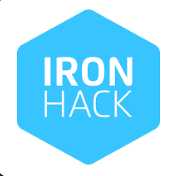

<h1 style="color: #00BFFF;">Exploratory Data Analysis Test</h1>

Exploratory data analysis (EDA) is amongst the first steps of analyzing data. 
* It is usually done with descriptive statistics, where you'll summarize the statistical aspects of your dataset and start to unravel your insights. 
* Further on, I highly recommend using data visualization in this step.

<h1 style="color: #00BFFF;">00 |</h1>

<div class="alert alert-block alert-info">
Tip # 1
Best practices; write all your libraries & functions at the beginning !
</div>

In [ ]:
# pip install matplotlib
# pip install seaborn

In [1]:
# 📚 Basic libraries
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
import warnings
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #00BFFF;">01 | Data Extraction</h1>

In [3]:
data = pd.read_csv('fifa_23.csv')

<h2 style="color: #008080;">Exploring the Data (First Impression)</h2>

In [4]:
data.shape

(18539, 89)

**First impression:**
    
_____________

The following dataset is a collection of **one-year** 18.539 player information distributed among 89 different columns. The majority of our data types are mostly **numericals** (71 integers / 18 objects).

Our **project goal** is to identify players who have the potential to become **the next "Mbappé"**. After reading the [documentation](https://www.kaggle.com/datasets/ekrembayar/fifa-21-complete-player-dataset?select=fifa21_male2.csv) we wil proceed with the following **strategy**:

1. The **target** of our dataset will be `Overall Score`, which is a summary of a player's performance and potential. 
2. Through **Exploratory Data Analysis** we will identify the features that contribute to this prediction.
_____________

<h2 style="color: #008080;">Column standardization</h2>

In [5]:
data.columns=[column.lower().replace(" ","_") for column in data.columns]

<h2 style="color: #008080;">Copy as best practices</h2>

In [6]:
df=data.copy()

<h1 style="color: #00BFFF;">02 | Data Cleaning</h1>

In [40]:
data.head() # para ver apenas as colunas sem linhas 

,known_as,full_name,overall,potential,value(in_euro),positions_played,best_position,nationality,image_link,age,height(in_cm),weight(in_kg),totalstats,basestats,club_name,wage(in_euro),release_clause,club_position,contract_until,club_jersey_number,joined_on,on_loan,preferred_foot,weak_foot_rating,skill_moves,international_reputation,national_team_name,national_team_image_link,national_team_position,national_team_jersey_number,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,crossing,finishing,heading_accuracy,short_passing,volleys,dribbling,curve,freekick_accuracy,longpassing,ballcontrol,acceleration,sprint_speed,agility,reactions,balance,shot_power,jumping,stamina,strength,long_shots,aggression,interceptions,positioning,vision,penalties,composure,marking,standing_tackle,sliding_tackle,goalkeeper_diving,goalkeeper_handling,_goalkeeperkicking,goalkeeper_positioning,goalkeeper_reflexes,st_rating,lw_rating,lf_rating,cf_rating,rf_rating,rw_rating,cam_rating,lm_rating,cm_rating,rm_rating,lwb_rating,cdm_rating,rwb_rating,lb_rating,cb_rating,rb_rating,gk_rating
0,L. Messi,Lionel Messi,91,91,54000000,RW,CAM,Argentina,https://cdn.sofifa.net/players/158/023/23_60.png,35,169,67,2190,452,Paris Saint-Germain,195000,99900000,RW,2023,30,2021,-,Left,4,4,5,Argentina,https://cdn.sofifa.net/flags/ar.png,RW,10,Low,Low,81,89,90,94,34,64,84,90,70,91,88,95,93,93,90,93,87,76,91,92,95,86,68,70,68,91,44,40,93,94,75,96,20,35,24,6,11,15,14,8,90,90,91,91,91,90,91,91,88,91,67,66,67,62,53,62,22
1,K. Benzema,Karim Benzema,91,91,64000000,"CF,ST",CF,France,https://cdn.sofifa.net/players/165/153/23_60.png,34,185,81,2147,455,Real Madrid CF,450000,131199999,CF,2023,9,2009,-,Right,4,4,4,France,https://cdn.sofifa.net/flags/fr.png,ST,19,Medium,Medium,80,88,83,87,39,78,75,92,90,89,88,87,82,73,76,91,79,80,78,92,72,87,79,82,82,80,63,39,92,89,84,90,43,24,18,13,11,5,5,7,91,87,89,89,89,87,91,89,84,89,67,67,67,63,58,63,21
2,R. Lewandowski,Robert Lewandowski,91,91,84000000,ST,ST,Poland,https://cdn.sofifa.net/players/188/545/23_60.png,33,185,81,2205,458,FC Barcelona,420000,172200000,ST,2025,9,2022,-,Right,4,4,5,Poland,https://cdn.sofifa.net/flags/pl.png,ST,9,High,Medium,75,91,79,86,44,83,71,94,91,84,89,85,79,85,70,89,76,75,77,93,82,91,85,76,87,84,81,49,94,81,90,88,35,42,19,15,6,12,8,10,91,85,88,88,88,85,88,86,83,86,67,69,67,64,63,64,22
3,K. De Bruyne,Kevin De Bruyne,91,91,107500000,"CM,CAM",CM,Belgium,https://cdn.sofifa.net/players/192/985/23_60.png,31,181,70,2303,483,Manchester City,350000,198900000,CM,2025,17,2015,-,Right,5,4,4,Belgium,https://cdn.sofifa.net/flags/be.png,RF,7,High,High,74,88,93,87,64,77,94,85,55,93,83,88,89,83,93,90,76,73,76,91,78,92,63,88,74,91,75,66,88,94,83,89,68,65,53,15,13,5,10,13,86,88,87,87,87,88,91,91,91,91,82,82,82,78,72,78,24
4,K. Mbappé,Kylian Mbappé,91,95,190500000,"ST,LW",ST,France,https://cdn.sofifa.net/players/231/747/23_60.png,23,182,73,2177,470,Paris Saint-Germain,230000,366700000,ST,2024,7,2018,-,Right,4,5,4,France,https://cdn.sofifa.net/flags/fr.png,ST,10,High,Low,97,89,80,92,36,76,78,93,72,85,83,93,80,69,71,91,97,97,93,93,81,88,77,87,76,82,64,38,92,83,80,88,26,34,32,13,5,7,11,6,92,90,90,90,90,90,92,92,84,92,70,66,70,66,57,66,21


<h2 style="color: #008080;">Feature Selection (Dropping unnecesary features)</h2>

In [8]:
data.shape

(18539, 89)

_____________
From all features above, we will drop the following:
* `know_as`, `full_name`, `image_link`, `national_team_image` it's just the player identifier.
* `club_name`, `club_position`, `contract_until`, `club_jersey_number`, `joined_on`, `on_loan` these are specific to the player's current club situation and do not directly influence their potential or performance metrics.
* `national_team_name`, `national_team_position`, `national_team_jersey_number` are unnecessary details.
* `st_rating`, `lw_raating`, `cf_rating` are giving us to much detail of the player information, not needed if we are focusing on **overall score** and best position.
* Also, since we are looking for **field players** we can drop some goalkeeper-specific features like `goalkeeper_diving`, `goalkeeper_handling`, `_goalkeeperkicking`, `goalkeeper_positioning` and `goalkeeper_reflexes`
* Aggregated stats like `totalstats` and `basestats` are the sum of different stats. Same with `crossing`, `finishing`, etc., are the sum of `attacking`
    * Attacking = crossing, finishing, heading_accuracy, short_passing, volleys
    * Skill = dribbling, curve, fk_accuracy, long_passing, ball_control
    * Movement = acceleration, sprint_speed, agility, reactions, balance
    * Power = shot_power, jumping, stamina, strength, long_shots
    * Mentality = aggression, interceptions, positioning, vision, penalties, composure
    * Defending = marking, standing_tackle, sliding_tackle
_____________

In [9]:
df = df.drop(columns=['known_as', 'full_name', 'image_link', 'national_team_image_link',
                      'club_name', 'club_position', 'contract_until', 'club_jersey_number',
                      'joined_on', 'on_loan', 'national_team_name', 'national_team_position',
                      'national_team_jersey_number', 'st_rating', 'lw_rating', 'cf_rating',
                      'rf_rating', 'rw_rating', 'cam_rating', 'lm_rating', 'cm_rating',
                      'rm_rating', 'lwb_rating', 'cdm_rating', 'rwb_rating', 'lb_rating',
                      'cb_rating', 'rb_rating', 'gk_rating',
                      'goalkeeper_diving', 'goalkeeper_handling', '_goalkeeperkicking',
                      'goalkeeper_positioning', 'goalkeeper_reflexes', 'totalstats',
                      'basestats', 'crossing', 'finishing', 'volleys', 'dribbling', 
                      'curve', 'freekick_accuracy', 'longpassing', 'ballcontrol', 
                      'acceleration', 'sprint_speed', 'agility', 'reactions', 
                      'balance', 'shot_power', 'jumping', 'stamina', 'strength', 
                      'long_shots', 'aggression', 'interceptions', 'positioning', 
                      'vision', 'penalties', 'composure', 'marking', 'standing_tackle', 
                      'sliding_tackle', 'positions_played'])

In [11]:
df.shape

(18539, 25)

<h2 style="color: #008080;">Checking Null Values</h2>

In [13]:
df.isnull().sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Checking Duplicates</h2>

In [18]:
df.duplicated().sum()

0

In [17]:
df.drop_duplicates(inplace=True)

<h2 style="color: #008080;">Checking Emtpy Spaces</h2>

In [19]:
df.eq(" ").sum()

overall                     0
potential                   0
value(in_euro)              0
best_position               0
nationality                 0
age                         0
height(in_cm)               0
weight(in_kg)               0
wage(in_euro)               0
release_clause              0
preferred_foot              0
weak_foot_rating            0
skill_moves                 0
international_reputation    0
attacking_work_rate         0
defensive_work_rate         0
pace_total                  0
shooting_total              0
passing_total               0
dribbling_total             0
defending_total             0
physicality_total           0
heading_accuracy            0
short_passing               0
lf_rating                   0
dtype: int64

<h2 style="color: #008080;">Moving our target to the right</h2>

In [20]:
df.columns

Index(['overall', 'potential', 'value(in_euro)', 'best_position',
       'nationality', 'age', 'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)',
       'release_clause', 'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating'],
      dtype='object')

In [23]:
df.head(3)

,potential,value(in_euro),best_position,nationality,age,height(in_cm),weight(in_kg),wage(in_euro),release_clause,preferred_foot,weak_foot_rating,skill_moves,international_reputation,attacking_work_rate,defensive_work_rate,pace_total,shooting_total,passing_total,dribbling_total,defending_total,physicality_total,heading_accuracy,short_passing,lf_rating
0,91,54000000,CAM,Argentina,35,169,67,195000,99900000,Left,4,4,5,Low,Low,81,89,90,94,34,64,70,91,91
1,91,64000000,CF,France,34,185,81,450000,131199999,Right,4,4,4,Medium,Medium,80,88,83,87,39,78,90,89,89
2,91,84000000,ST,Poland,33,185,81,420000,172200000,Right,4,4,5,High,Medium,75,91,79,86,44,83,91,84,88


In [22]:
target=df.pop("overall") #pop é semelhante a drop porque elimina a coluna mas armazena a coluna numa variavel
#muito usado em Machine Learning

In [25]:
target #series em vez de dataframe

0        91
1        91
2        91
3        91
4        91
         ..
18534    47
18535    47
18536    47
18537    47
18538    47
Name: overall, Length: 18420, dtype: int64

In [24]:
df["overall"] = target #permite voltar a colocar overall no dataframe

<div class="alert alert-block alert-info">
Tip # 2
How to move your target to the right
</div>

[stackoverflow](https://stackoverflow.com/questions/35321812/move-column-in-pandas-dataframe)

<h1 style="color: #00BFFF;">03 | EDA (Exploratory Data Analysis)</h1>

<h2 style="color: #008080;">Statistical information about the numerical columns</h2>

In [27]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
potential,18420.0,7.096330e+01,6.170634e+00,48.0,67.0,71.0,75.0,95.0
value(in_euro),18420.0,2.842697e+06,7.645260e+06,0.0,475000.0,975000.0,2000000.0,190500000.0
age,18420.0,2.524392e+01,4.725456e+00,16.0,21.0,25.0,29.0,44.0
height(in_cm),18420.0,1.815508e+02,6.855181e+00,155.0,177.0,182.0,186.0,206.0
weight(in_kg),18420.0,7.517014e+01,7.006937e+00,49.0,70.0,75.0,80.0,105.0
wage(in_euro),18420.0,8.733100e+03,1.945242e+04,0.0,1000.0,3000.0,7000.0,450000.0
release_clause,18420.0,5.015212e+06,1.468605e+07,0.0,660000.0,1500000.0,3300000.0,366700000.0
weak_foot_rating,18420.0,2.944680e+00,6.734085e-01,1.0,3.0,3.0,3.0,5.0
skill_moves,18420.0,2.363626e+00,7.709092e-01,1.0,2.0,2.0,3.0,5.0
international_reputation,18420.0,1.086265e+00,3.590050e-01,1.0,1.0,1.0,1.0,5.0


<div class="alert alert-block alert-info">
Tip # 3

How to interpret basic statistics</div>

+ Measures of central tendency - Mean, median, mode
+ Measures of spread / dispersion - SD, var, range, quartiles, percentiles
+ Meaures of frequency - Frequency

+ **Range:** defines the difference between the highest and lowest values.
+ **Variance**: measures how far each number in the set is from the mean and thus from every other number in the set.
+ **Standard deviation:** The standard deviation is a statistic that measures the dispersion of a dataset relative to its mean and is calculated as the square root of the variance
+ **Quartiles:** A quartile is a statistical term that describes a division of observations into four defined intervals based on the values of the data and how they compare to the entire set of observations.
+ **Percentiles:** same but divided in 100 groups.

![quartiles](https://www.onlinemathlearning.com/image-files/median-quartiles.png)

### Exercise 1: What is the [Inter Quartile Range (IQR)](https://medium.com/@vinitasilaparasetty/quartiles-for-beginners-in-data-science-2ca5a640b07b)? What conclusions can we draw from `describe`?

Inter Quartile Range is the difference between the 75% column (Q3) and the 25% column (Q1). It indicates the 50% of the values that are in the middle of the data (25% up and 25% down from the exact middle point)

From Describe(), it is possible to get an idea of the central tendency of a certain characteristic (mean), the dispersion (std and range - difference between max and min), the distribution (Q1, Q2 and Q3) and it is possible to understand if there is going to have some outliers (min and max).

<h2 style="color: #008080;">Selecting numerical</h2>

In [28]:
num=df.select_dtypes("number")

<h2 style="color: #008080;">Checking Distributions</h2>

#### Using maptplotlib ---> Check [documentation](https://matplotlib.org/) !

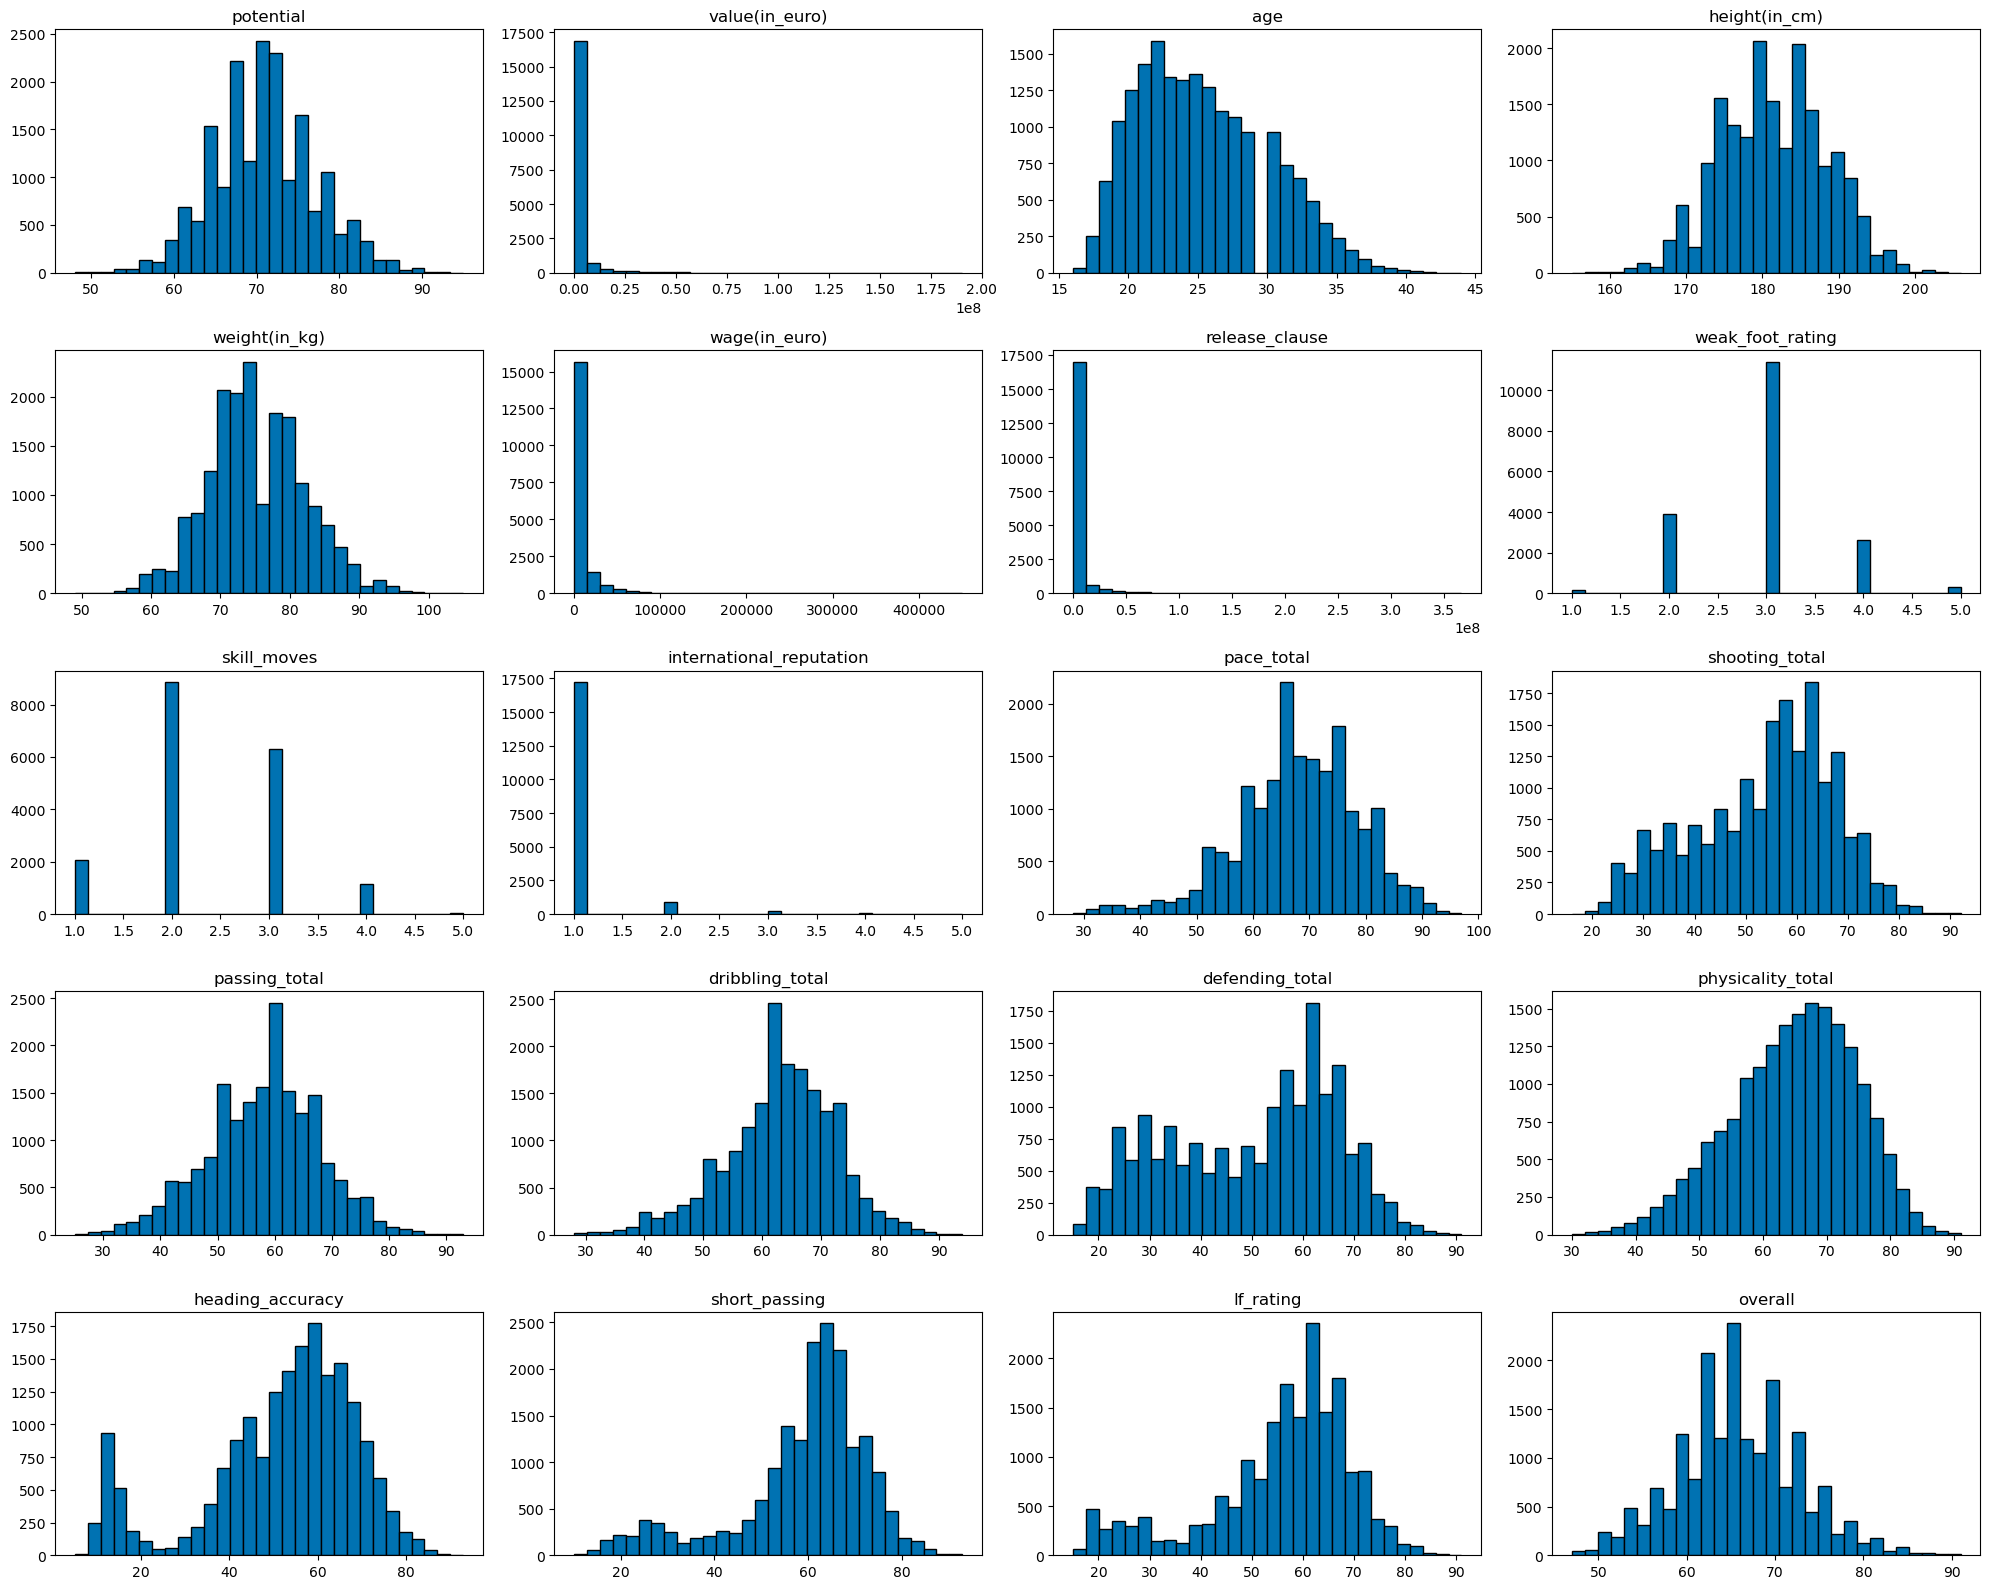

In [29]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4  # adjust for your number of features

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

# Plot each numerical feature
for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)  # hide unesed plots
        continue
    ax.hist(num.iloc[:, i], bins=30, color=color, edgecolor='black')
    ax.set_title(num.columns[i])

plt.tight_layout()
plt.show()

### Exercise 2: How do we interpret these histograms?

I think it is possible to conclude that some numerical variables can be treaten as categorical as value(in_euro), wage(in_euro), release_clause, weak_foot_rating, skill_moves and international_reputation.

Looking at these histograms there are characteristics that can be bimodal, some we can assume a normal distribution and others are skewed. 

Regarding the 'overall' characteristic I think it's possible to say that follows a normal distribution with 65 as the most common value.

In [30]:
boxplot = num[['value(in_euro)', 'wage(in_euro)', 'release_clause', 'dribbling_total', 'short_passing', 'lf_rating']]

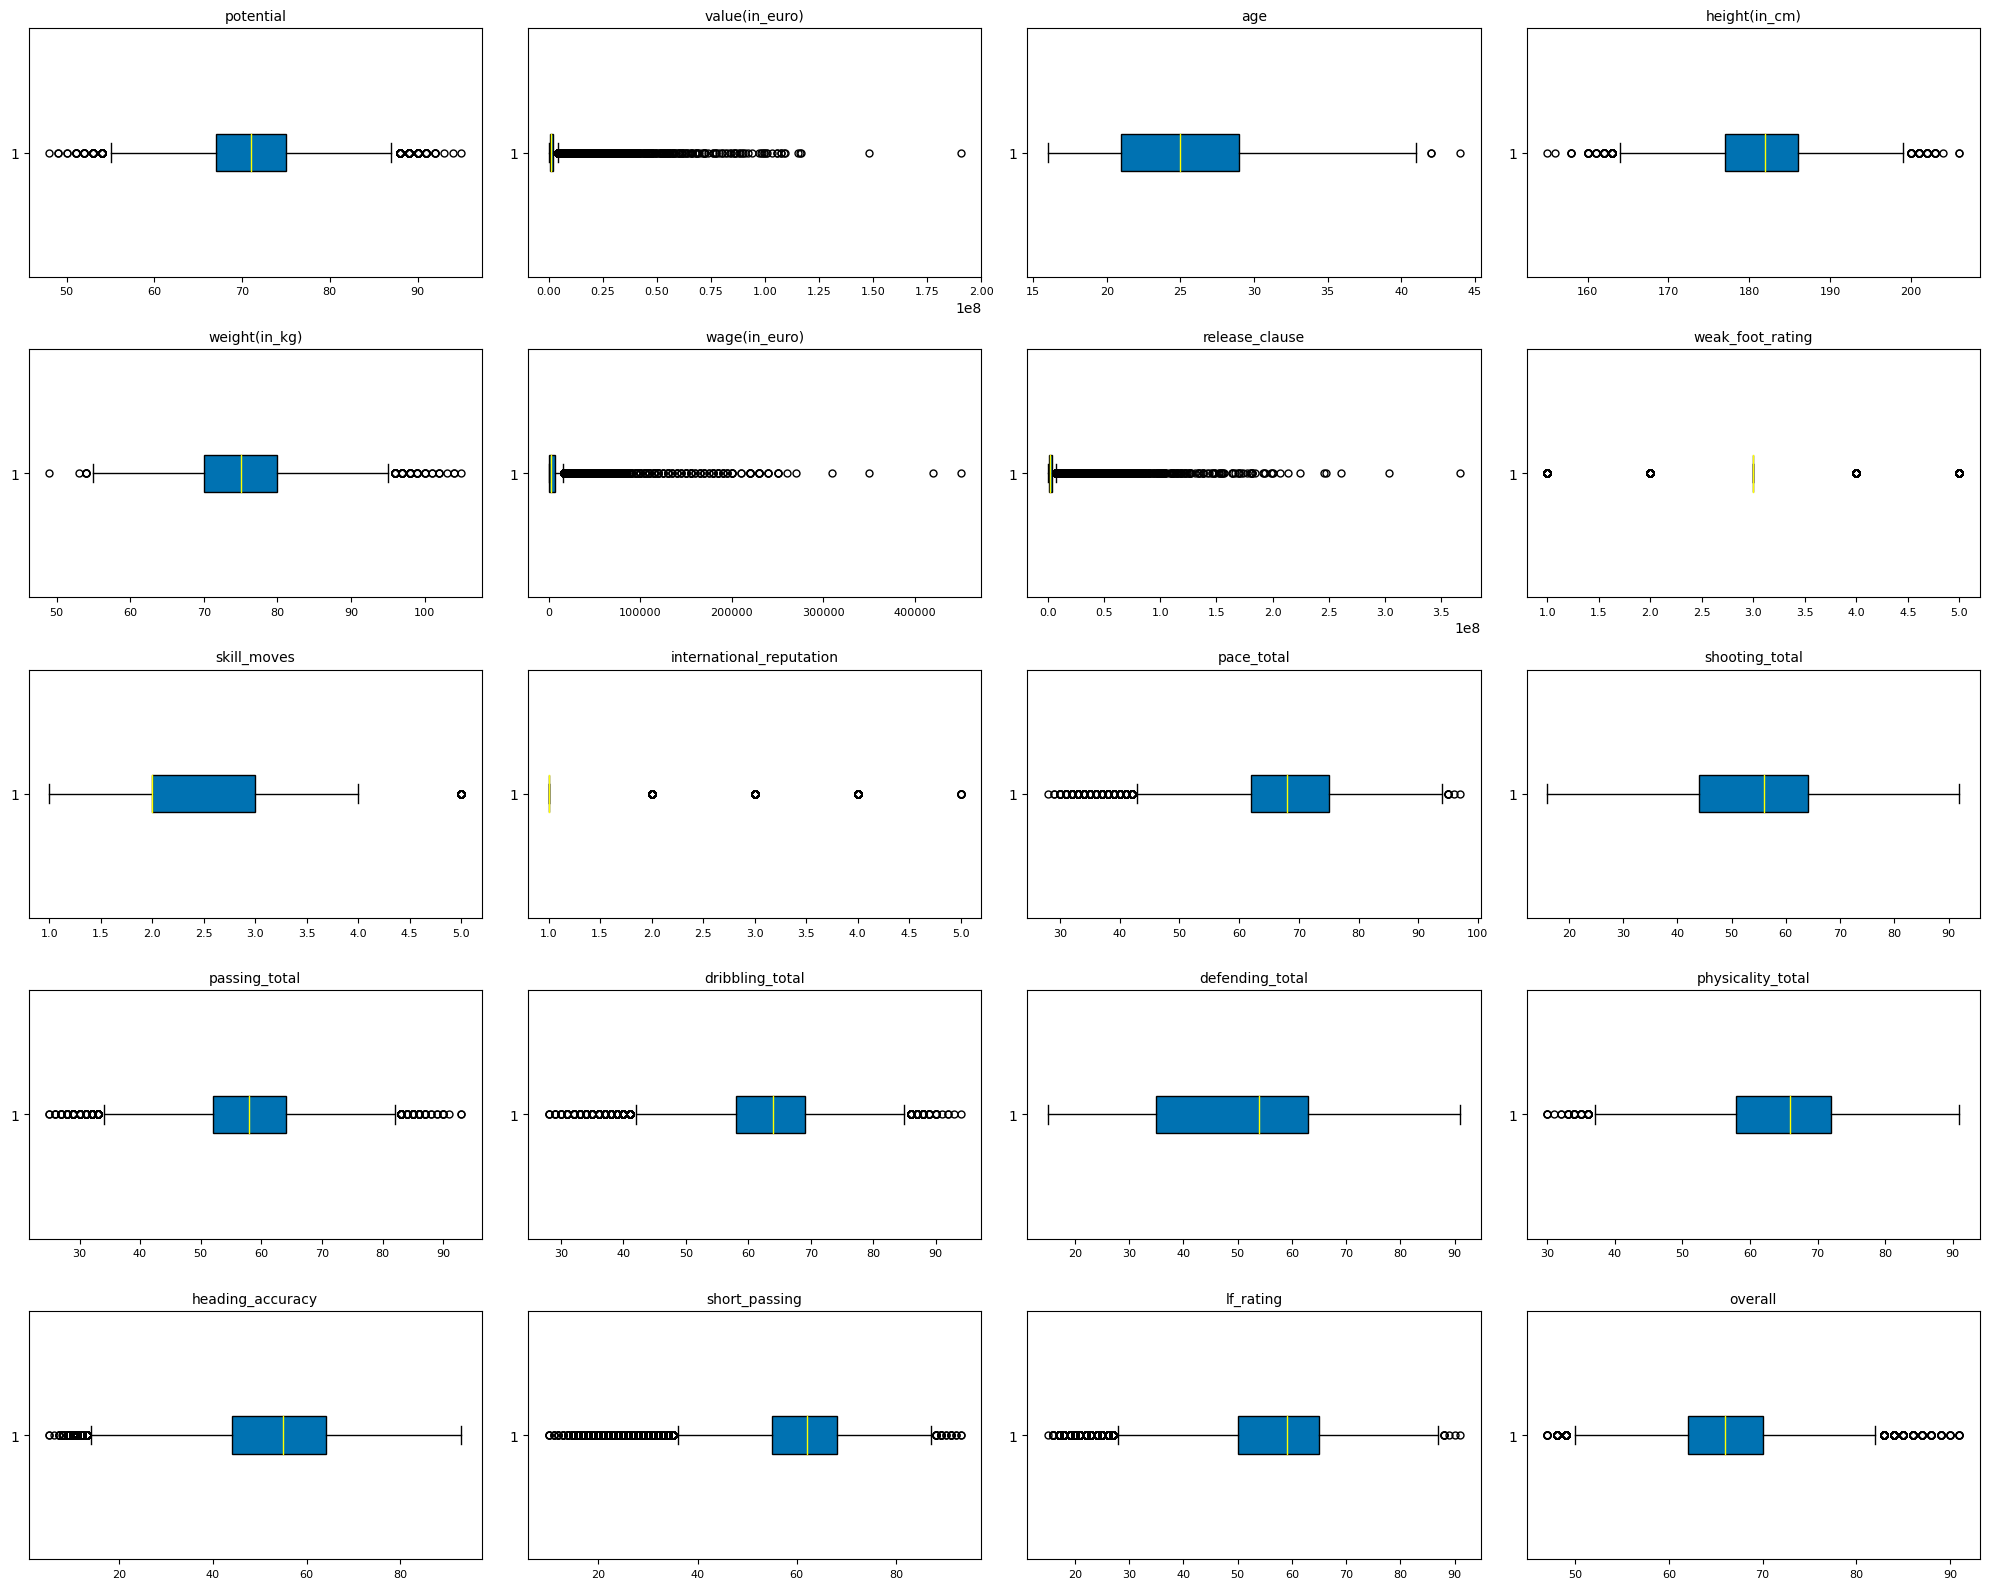

In [31]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(num.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(num.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(num.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)

plt.tight_layout()
plt.show()

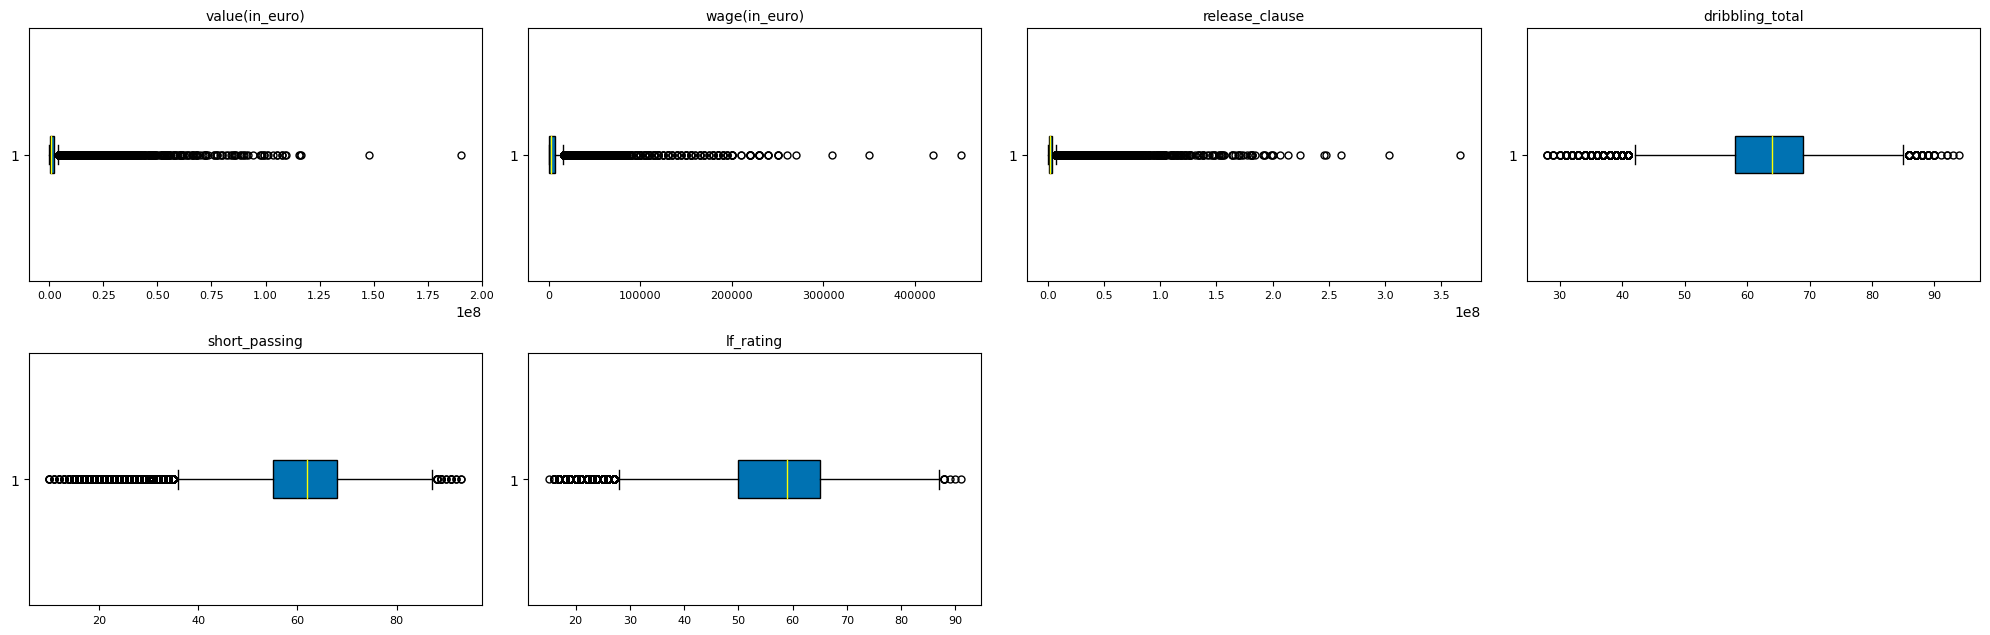

In [32]:
color = '#0072B2'

# grid size
nrows, ncols = 5, 4 

fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(20, 16))

axes = axes.flatten()

for i, ax in enumerate(axes):
    if i >= len(boxplot.columns):
        ax.set_visible(False)
        continue
    ax.boxplot(boxplot.iloc[:, i].dropna(), vert=False, patch_artist=True, 
               boxprops=dict(facecolor=color, color='black'), 
               medianprops=dict(color='yellow'), whiskerprops=dict(color='black'), 
               capprops=dict(color='black'), flierprops=dict(marker='o', color='red', markersize=5))
    ax.set_title(boxplot.columns[i], fontsize=10)
    ax.tick_params(axis='x', labelsize=8)  # Adjust x-axis ticks

plt.tight_layout()
plt.show()

### Exercise 3: What conclusions can you draw from the box plots?

I think the conclusions that is possible to take from the box plots are similar from the histogram.

In the box plot I think it's easier to see the amount of outliers and if a characterist has a lot of outliers could be drop of the analysis.

I think it's also easier to see the variability and the range of important results

Low spread - many outliers
high spread - low outliers

<h2 style="color: #008080;">Looking for Correlations</h2>

In [35]:
num_corr=round(num.corr(),2)

<div class="alert alert-block alert-info">
Tip # 4
    
- We don't want multicolinearity --> correlation between features biases the model...
- We want high correlations (+ or -) with the target --> valuable information for the predictions</div>

#### Checking correlations with [Seaborn](https://seaborn.pydata.org/index.html)

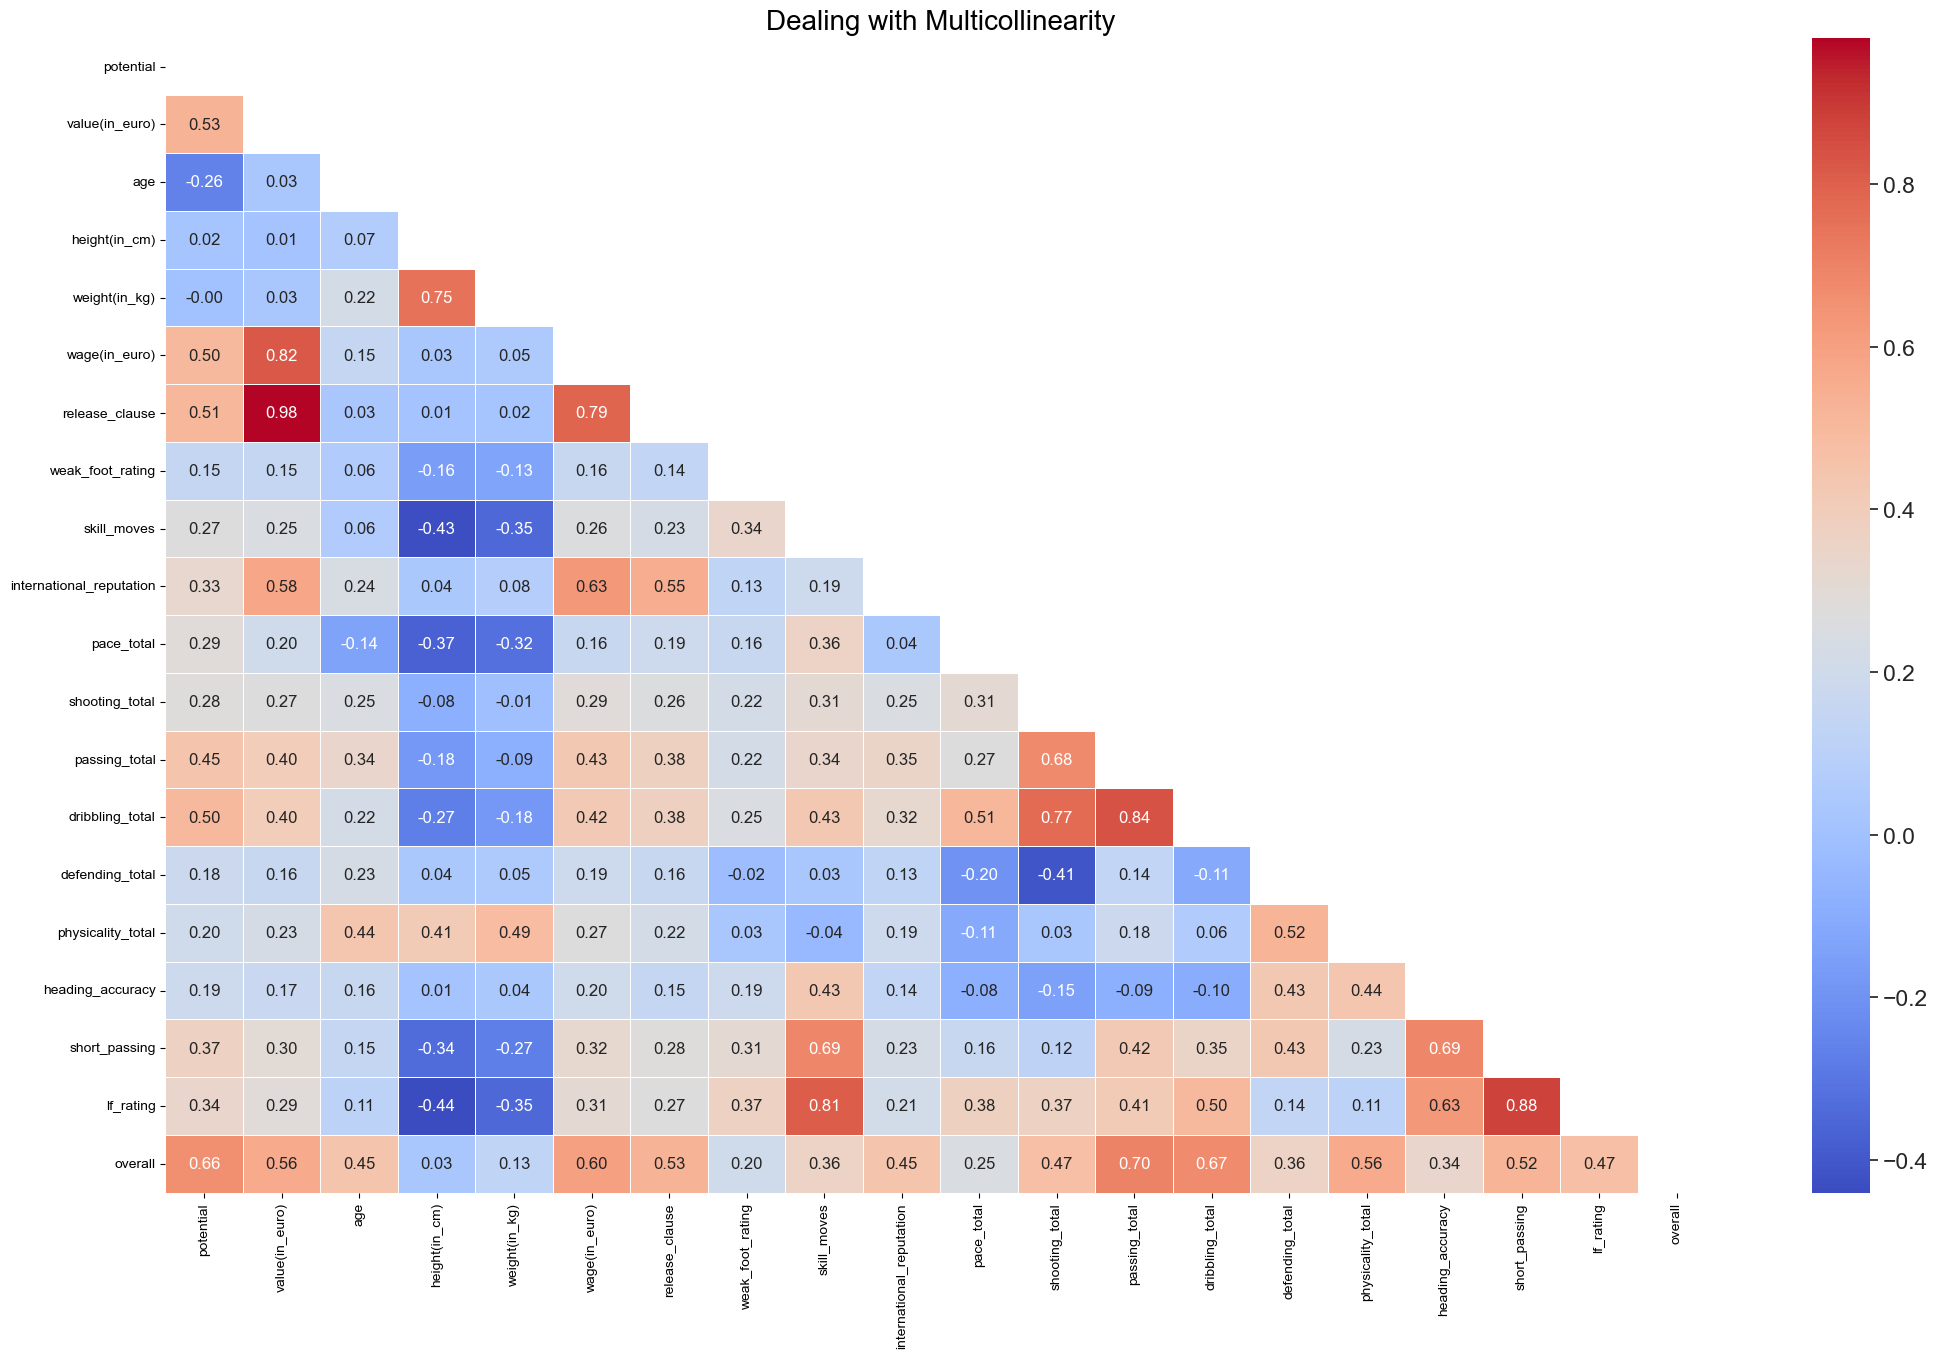

In [36]:
# Correlation Matrix-Heatmap Plot
mask = np.zeros_like(num_corr)
mask[np.triu_indices_from(mask)] = True # optional, to hide repeat half of the matrix
f, ax = plt.subplots(figsize=(25, 15))
sns.set(font_scale=1.5) # increase font size
ax = sns.heatmap(num_corr, mask=mask, annot=True, annot_kws={"size": 12}, linewidths=.5, cmap="coolwarm", fmt=".2f", ax=ax) # round to 2 decimal places
ax.set_title("Dealing with Multicollinearity", fontsize=20) # add title
plt.show()

In [34]:
df.columns

Index(['potential', 'value(in_euro)', 'best_position', 'nationality', 'age',
       'height(in_cm)', 'weight(in_kg)', 'wage(in_euro)', 'release_clause',
       'preferred_foot', 'weak_foot_rating', 'skill_moves',
       'international_reputation', 'attacking_work_rate',
       'defensive_work_rate', 'pace_total', 'shooting_total', 'passing_total',
       'dribbling_total', 'defending_total', 'physicality_total',
       'heading_accuracy', 'short_passing', 'lf_rating', 'overall'],
      dtype='object')

### Exercise 4: How to interpret this correlation matrix? Which other correlation methods we know?

The higher the value, the more correlate two characteristics are.


Correlation methods we know: Pearson and Spearman

### Specific Correlations with the Target

In [54]:
correlation_1 = df['overall'].corr(df['international_reputation'])
correlation_1

0.4509709675612332

In [ ]:
pearson_corr

In [55]:
correlation_2 = df['overall'].corr(df['international_reputation'], method='spearman')
correlation_2

0.3806849867171602

The Pearson correlation of (0.4510) suggests a weak positive linear relationship between the overall and international_reputation.

The Spearman correlation of (0.3807) indicates a weak positive monotonic relationship between the overall and international_reputation.

### Formulate the Null Hypothesis

Null Hypothesis can be 'overall' is not correlate with the 'age', for example.

### Perform 3 Plots and Explain the Findings from the Data

<Axes: xlabel='international_reputation', ylabel='overall'>

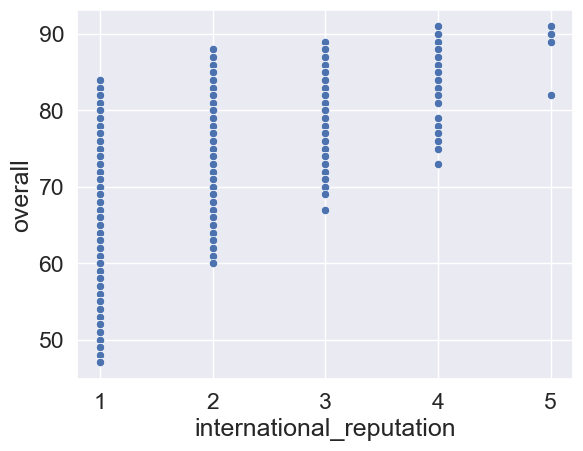

In [60]:
sns.scatterplot(data=df, x='international_reputation', y='overall')

Looking at this scatter plot it looks that the better the overall, more international_reputation the player has. But also scatter plot shouldn't look like this. This is because before, it was conclude that the international_reputation could be treat as categorical.

<Axes: xlabel='age', ylabel='overall'>

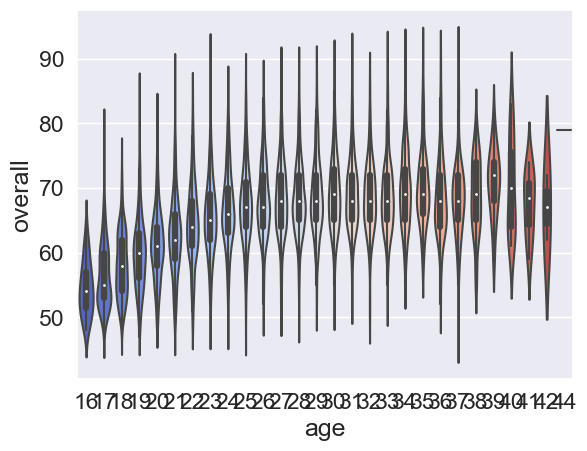

In [42]:
sns.violinplot(data=df, x='age', y='overall', palette="coolwarm")

Looking to this violin plot it looks that the overall only increases until a certain age

<Axes: xlabel='overall', ylabel='passing_total'>

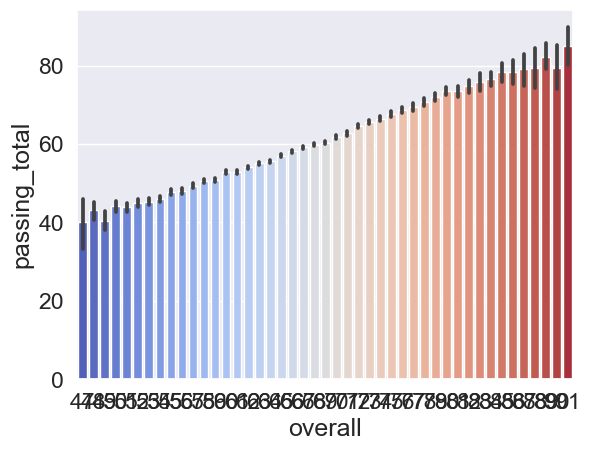

In [43]:
sns.barplot(data=df, x='overall', y='passing_total', palette="coolwarm")

Here it's possible to see what was already saw in the heatmap. The correlation between overall and passing_total is obvious.

### Extra: Do an Statistical Test

In [45]:
crosstab = pd.crosstab(df['overall'], df['age'])

In [46]:
from scipy.stats import chi2_contingency

In [47]:
chi2_statistic, chi2_p_value, _, _ = chi2_contingency(crosstab)

chi2_statistic, chi2_p_value

(7835.260170106095, 0.0)

Since the p_value is <0.05 it's possible to reject the null hyphotesis, so it is possible to say that overall and age are correlate.

<h1 style="color: #00BFFF;">04 | Data Processing</h1>

<h2 style="color: #008080;">X-Y Split</h2>

<h2 style="color: #008080;">Normalizing the Data</h2>

<h1 style="color: #00BFFF;">05 | Modeling</h1>

<h2 style="color: #008080;">Train-Test Split</h2>

<h2 style="color: #008080;">Model Validation</h2>

<h1 style="color: #00BFFF;">06 | Improving the Model</h1>

<h1 style="color: #00BFFF;">07 | Reporting</h1>